In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")


### sesuaikan pretraine model indobert, dengan yang ada di hugging face

### ini pakek last hidden layer

In [18]:
# Function to get word embeddings
def get_word_embeddings(words):
    inputs = tokenizer(words, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the embeddings from the last hidden state
    embeddings = outputs.last_hidden_state
    # Get the embeddings of the first token ([CLS])
    return embeddings[:, 0, :].numpy()

### Ini pakek Pooler Output

In [13]:
# Function to get word embeddings
def get_word_embeddings(words):
    inputs = tokenizer(words, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the embeddings from pooler output
    embeddings = outputs['pooler_output']
    return embeddings.numpy()

In [14]:
words = ["Amil", "Zakat", "Badal", "Thawaf", "Thawaf ifadhah", "Taswiyah", "Al-Manhaj", "Taswiyah Al-Manhaj", "Pola pikir", "keagamaan", "plasenta", "hewan", "halal", "bahan", "obat", "Alkohol", "etanol", "transplantasi", "organ", "jaringan tubuh", "diri sendiri", "donor", "Haji", "daftar", "usia", "dini"]
embeddings = get_word_embeddings(words)
embeddings

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


array([[ 0.501392  , -0.34162936,  0.23942469, ..., -0.3031636 ,
         0.30047414,  0.15804555],
       [ 0.5483118 ,  0.19311614,  0.3682104 , ..., -0.21110526,
         0.2286654 ,  0.12395434],
       [ 0.37051526,  0.01057457,  0.5309103 , ...,  0.32449758,
         0.05878125, -0.34374508],
       ...,
       [ 0.85949475,  0.40891862,  0.29620498, ..., -0.4848726 ,
         0.06444158,  0.3721618 ],
       [ 0.480223  ,  0.5120942 ,  0.08536411, ..., -0.44705212,
        -0.3026718 ,  0.41570622],
       [ 0.39450374,  0.14474888, -0.20156908, ..., -0.25582862,
         0.17024957,  0.41502133]], dtype=float32)

In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings

array([[-2.2035909 , -2.63276   ],
       [-2.1730852 , -0.43024203],
       [ 0.07290723,  0.06486405],
       [-1.6847323 ,  0.82495755],
       [ 8.829554  , -1.4259226 ],
       [-2.177856  , -0.8974927 ],
       [ 1.930967  ,  3.561713  ],
       [ 8.080425  , -2.1473813 ],
       [ 3.09638   ,  7.078272  ],
       [-1.0691255 , -2.2363145 ],
       [ 1.6259066 , -0.6183619 ],
       [-1.5586011 , -0.80218303],
       [-2.1455617 , -2.8990405 ],
       [-1.9212441 , -2.3711858 ],
       [-1.8498269 , -1.1268648 ],
       [-1.5388798 , -0.08080916],
       [-0.9093236 , -0.70953846],
       [-1.3127393 ,  2.6097555 ],
       [ 7.375091  , -2.6859417 ],
       [-2.4021099 , -2.524256  ],
       [-0.82200134,  5.739099  ],
       [-0.5894271 ,  1.3533554 ],
       [-2.2239246 , -1.6506107 ],
       [-1.5685455 , -1.5391546 ],
       [-1.9604416 ,  0.78267866],
       [-0.90021217,  4.763363  ]], dtype=float32)

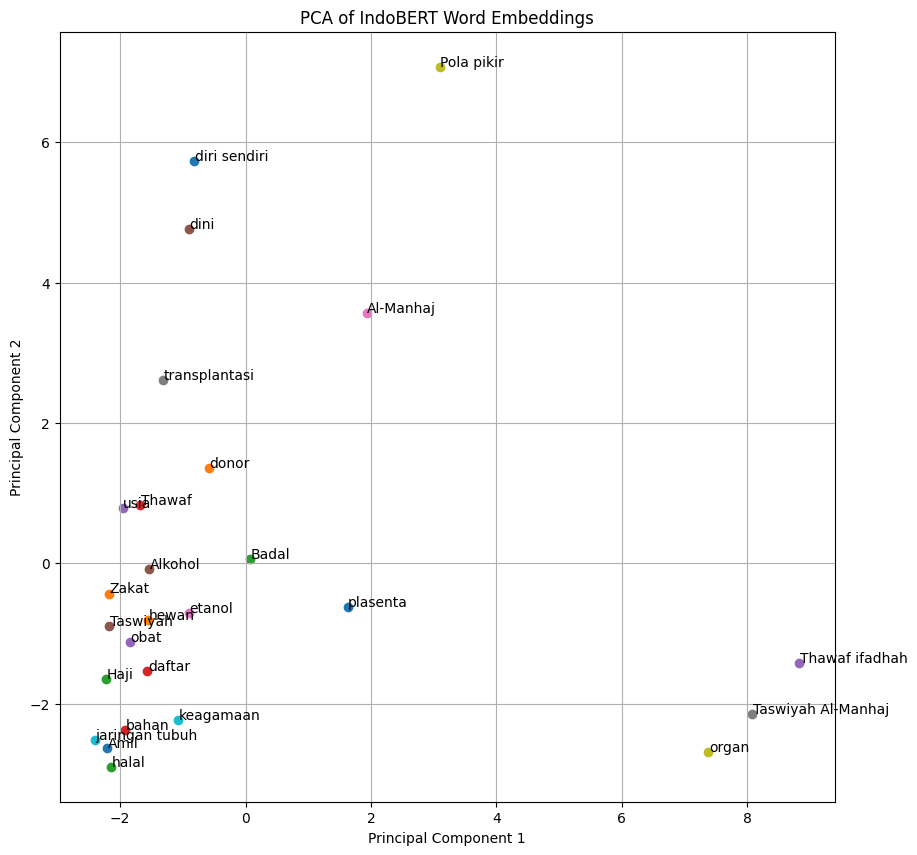

In [16]:
import matplotlib.pyplot as plt

# Plot the reduced embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word)

plt.title('PCA of IndoBERT Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()